# Simulate a pendulum with a spring arm

## Paul Osterhus



See https://math.arizona.edu/~gabitov/teaching/141/math_485/Midterm_Presentations/Elastic_Pedulum.pdf

See the reference above for the physics because it's too hard to type all that. It's easy enough to follow (if you know enough physics to know Lagrangians). Diagram also stolen

![image](assets/springPendulum.png)

$l$ is the static length of the spring with mass $m$.
$x$ is the lengthening (shortening) of the spring.
$\theta$ is the angle of the spring (zero is vertical). 
$k$ is the spring constant
$g$ is the gravitional constant

This assumes things like all motion is in a plane, the spring doesn't twist or bend. That is good, because animating twisting and bending and 3-d motion is hard.There is also no friction or any sort of energy loss here. Also, the constraints are not enforced (eg: the pendulum arm length could go negative). We just need to stay away from the breaking points

The following equations were derived.

$m$$\ddot x$  =  $m$$\cdot$($l + x$)$\cdot$$\dot\theta^2$ + $mg$$\cdot$$cos$($\theta$) - $kx$ 

$m$$\cdot$ ($l + x$)$\cdot$$\ddot\theta$ + $2m$$\dot x$$\dot\theta$ = -$mg$$\cdot$$sin$($\theta$)

There is no hope of solving this set of equations. None. Abandon all hope.

But we can approximate the solution, at least a bit. This is where I start in. Follow the old established rut. 

Start with a state vector

$Y$ = [ $x$, $\dot x$, $\theta$, $\dot\theta$ ]

The state vector completely describes our system. Our job is to make this useful.

Create two new convenience variables

u = $\dot x$

v = $\dot\theta$

So we get

$Y$ = [ $x$, $u$, $\theta$, $v$ ]

This state vector describes the system at any time t. We want to see how the state changes over time, so lets do that

$\dot Y$ = [ $\dot x$, $\dot u$, $\dot\theta$, $\dot v$ ]

Do the easy part first. Substitue the identies above

$\dot Y$ = [ $u$, $\dot u$, $v$, $\dot v$ ]

Now substitute the identies into the ODEs above, then isolate the derivatives

$\dot u$ = ($l + x$)$v^2$ + $g$ $cos$$\theta$ - $kx/m$

$\dot v$ = -($g$ $sin$$\theta$ + $2uv$) / ($l + x$)

So now we can calc $\dot Y$ knowing only the current state $Y$

Lets Do It!


## The integrating code


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# This is the state integrating function. Variables as above with w standing for theta

def sprindulum(y,t,l,m,k):
    x = y[0]
    u = y[1]
    w = y[2]
    v = y[3]
    udot = (l+x)*v*v + g * np.cos(w) - k * x / m
    vdot = -(g * np.sin(w) + 2 * u * v) / (l + x)
    return np.array([u,udot,v,vdot])

In [3]:
# define constants, initial conditions, establish time range

m = 2.0
l = 1.0
k = 25.0
g = 9.8
Y0 = np.array([0.1*l,0,np.pi/3,0]) # initial conditions
t = np.linspace(0,100,1001)

In [4]:
#Now I let Those Who Come Before do their magic

sol = odeint(sprindulum,Y0,t,args=(l,m,k))

## Examine the solution

I now have the solution, so lets check the data. Pretty plots are usually helpful.

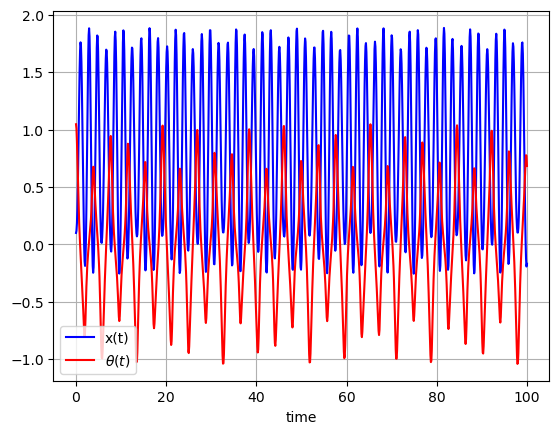

In [5]:
plt.plot(t,sol[:,0], 'b', label=r'x(t)')
plt.plot(t,sol[:,2], 'r', label=r'$\theta(t)$')
plt.legend(loc='best')
plt.xlabel('time')
plt.grid()
plt.show()

Thats not terribly pretty but can be useful. The rest of the charts are prettier. I promise.

Here is a plot of x (the "stretch" of the arm") vs the angle. It shows how the energy flows from vertical motion to swinging motion (if you think about it a bit).

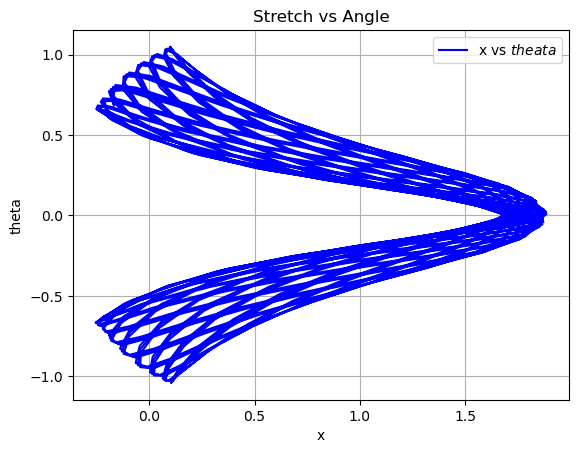

In [6]:
plt.plot(sol[:,0],sol[:,2], 'b', label=r'x vs $theata$')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('theta')
plt.title("Stretch vs Angle")
plt.grid()
plt.show()

I plot this again below but showing the total length of the arm and I've swapped the two axis for a reason that no longer matters

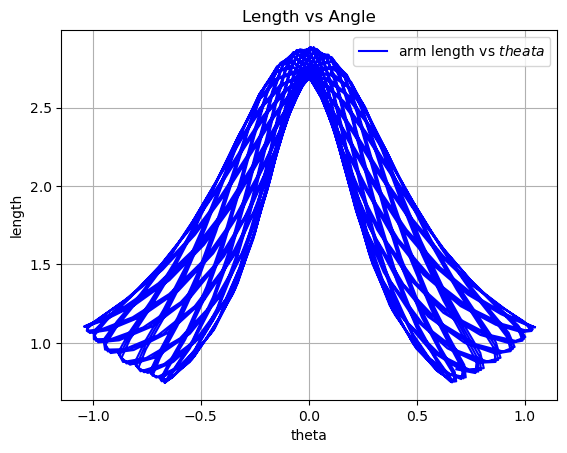

In [7]:
plt.plot(sol[:,2],sol[:,0]+1, 'b', label=r'arm length vs $theata$')
plt.legend(loc='best')
plt.xlabel('theta')
plt.ylabel('length')
plt.title("Length vs Angle")
plt.grid()
plt.show()

Next is a plot showing the linear vs angular velocities

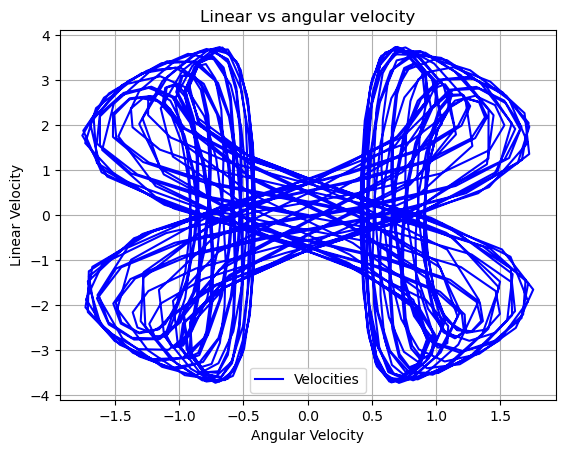

In [8]:
plt.plot(sol[:,3],sol[:,1], 'b', label="Velocities")
plt.legend(loc='best')
plt.xlabel('Angular Velocity')
plt.ylabel('Linear Velocity')
plt.title('Linear vs angular velocity')
plt.grid()
plt.show()

That butterfly one is the prettiest chart. Good thumbnail.

The following polar plot shows all the places visited by the pendulum.

This is not all that compelling, so I'll not bother making it prettier.

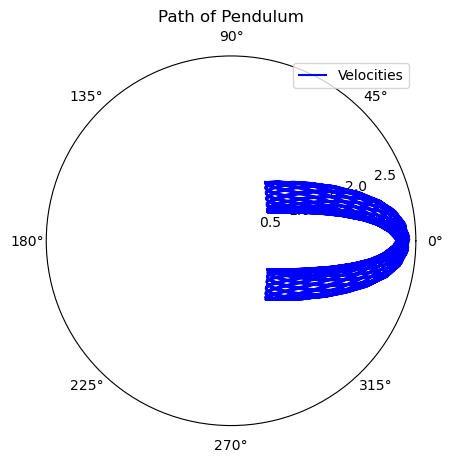

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.plot(sol[:,2],sol[:,0]+1, 'b', label="Velocities")
plt.legend(loc='best')
plt.title('Path of Pendulum')
plt.grid()
plt.show()

## Validation

I should do a little to try to validate this model. I'll see if the model conserves energy.

Energy is supposed to be conserved. Let $T$ be the total kinetic energy and $P$ be the potential energy. Then

$T$ + $P$ = c

where, of course, c is a constant

Because the radial velocity is always orthogonal to the velocity along the spring, we can just add the KE from each component, so

$T$ = m ($\dot x^2$ + $(l + x)^2\dot\theta^2$) / 2

Potential energy comes from gravitational potential and spring potential. From our good buddies Hooke and Newton, we get

$P$ = -$mg(l + x)cos\theta$ + $kx^2$/2

I leave it to the reader to determine which part of the equation above is from Hooke and which from Netwon.

If we plot kinetic energy vs potential energy, we should get a straight line with a -1 slope.

First step is to calculate the KE and PE for each point in the solution, then plot the result.

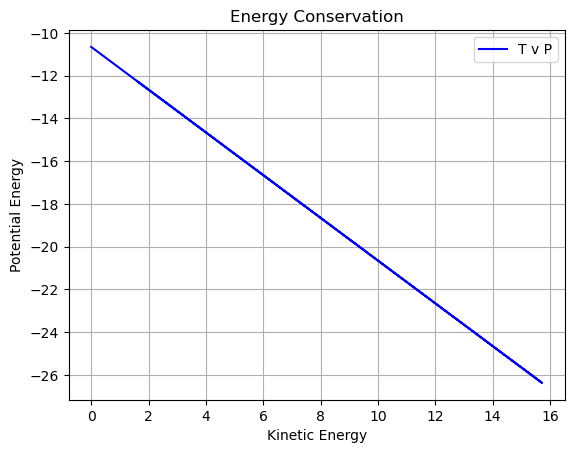

In [10]:
def kef(row):
    x = row[0]
    xdot = row[1]
    w = row[2]
    wdot = row[3]
    ke = m * (xdot * xdot + (l + x)*(l + x)*wdot*wdot) / 2
    return ke
    
def pef(row):
    x = row[0]
    xdot = row[1]
    w = row[2]
    wdot = row[3]
    pe = -m * g * (l + x) * np.cos(w) + k * x * x / 2
    return pe
    
T = [] # kinetic
P = [] # potential
E = [] # total diff

row = sol[0]
initial_energy = kef(row) + pef(row)

for row in sol:
    ke = kef(row)
    pe = pef(row)
    diff = 1000000.0 * (ke + pe - initial_energy)
    T.append([ke])
    P.append([pe])
    E.append([diff])

plt.plot(T[:],P[:], 'b',label='T v P')
plt.legend(loc='best')
plt.xlabel('Kinetic Energy')
plt.ylabel('Potential Energy')
plt.title('Energy Conservation')
plt.grid()
plt.show()

That looks very good. The line appears very straight. Excellent. KE is always positive. Re-assuring. The slope appears to be -1. Good, good.

Let's see how much the total energy varies over time. Since energy should be constant, the total energy of the initial state is that constant. I'll subtract the initial total from each sample to see the absolute drift over time. The drift should be zero but I expect a small drift.

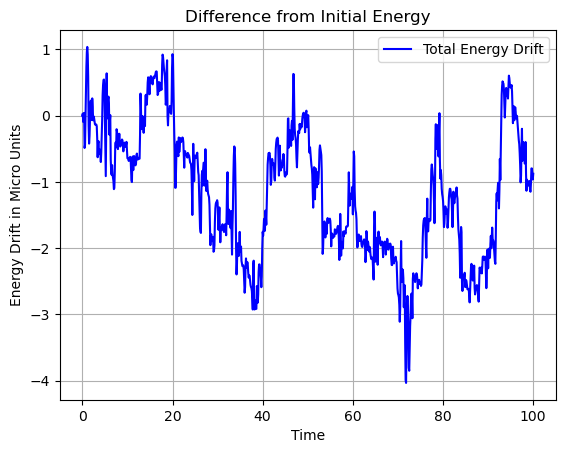

In [11]:
plt.plot(t[:],E[:], 'b',label='Total Energy Drift')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Energy Drift in Micro Units')
plt.title('Difference from Initial Energy')
plt.grid()
plt.show()

That is pretty good. An energy error of about 1e-06. I would say that this simulation is a good representation of an actual physical object of some kind. Maybe even of the kind I intended to model.

## Next Steps

For further investigation, I could see what is happening when the drift changes from increasing to decreasing or how the drift changes as the pendulum parameters change (I had to fiddle with them a bit to get something that was stable enough to simulate and interesting enough to investigate). 

It does not take too much of a change to the parameters to make the simulation to unstable. I could see what happens as instablity is approached and what computionally could be done to improve, avoid or tolerate the instability.

That sounds like lots of work. It might be more fun to do this in 3D. Or maybe a double pendulum with a spring for one arm? Or maybe switch to a heat flow simulation?

I think animation doesn't work well in a notebook, so I made the following with a standard python script. 

Note that the video uses the same constants as the other charts here but I started with more energy (the initial x value is 0.2l in the video and 0.1l in the notebook. The more energetic initial condtion makes the charts must less pretty but the less energetic version makes an even more boring video

<video controls src="assets/bouncyPendulum.mp4" />